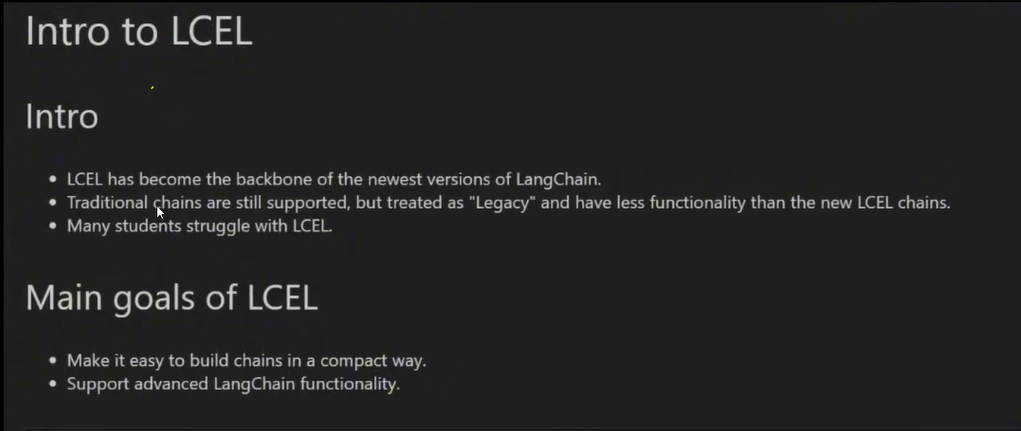

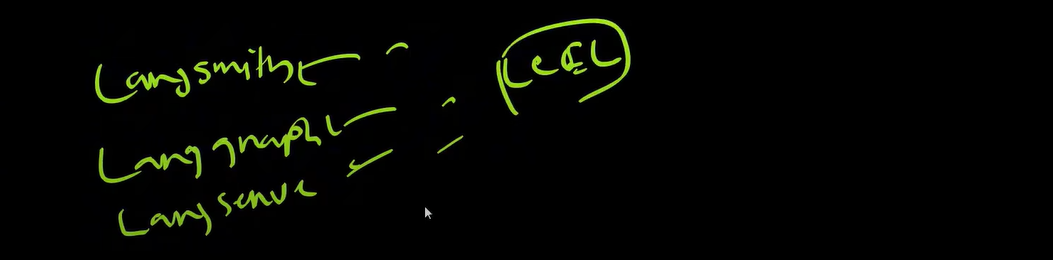

In [1]:
import os
from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv())
#openai_api_key = os.environ["OPENAI_API_KEY"]
groq_api_key = os.environ["GROQ_API_KEY"]

In [2]:
#from langchain_openai import ChatOpenAI
from langchain_groq import ChatGroq

chatModel = ChatGroq(model="llama-3.1-8b-instant")

### Simple LCEL

In [3]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate

prompt = ChatPromptTemplate.from_template("tell me a curious fact about {politician}")

chain = prompt | chatModel | StrOutputParser()

In [4]:
chain.invoke({"politician": "JFK"})

'Here\'s a curious fact about JFK:\n\nJohn F. Kennedy, the 35th President of the United States, was a war hero who served in World War II. However, what\'s less known is that he was a recipient of the Navy and Marine Corps Medal for his heroism during the war. This particular award was given to him for saving the crew of his patrol torpedo boat, PT-109, after it was struck by a Japanese destroyer in 1943.\n\nWhat\'s even more fascinating is that this award came with a unique stipulation: it was given for "heroism not involving conflict with an enemy," which is unusual for a combat medal. This was because Kennedy jumped into the water and swam through a sea of debris to rescue his fellow crew members, but there was no enemy in sight. He then helped to guide the survivors to safety, where they were eventually rescued.\n\nThis incident showcased Kennedy\'s bravery and leadership skills, which would later become essential qualities for his political career.'

# lagecy chain

In [8]:
from langchain.chains import LLMChain

prompt = ChatPromptTemplate.from_template("tell me a curious fact about {soccer_player}")

traditional_chain = LLMChain(
    llm=chatModel,
    prompt=prompt
) #when we use lagacy chain we don't need  order 

traditional_chain.predict(soccer_player="Maradona")


"Here's a curious fact about Diego Maradona:\n\nDid you know that Diego Maradona was banned from football for 15 months in 1991 for using cocaine? However, a more interesting fact is that in 1994, Maradona was tested for cocaine while serving as the coach of the Argentine national team at the 1994 World Cup. \n\nHe tested positive for cocaine and was subsequently banned from football for 15 months. This ban was a result of a clause in the FIFA regulations at the time that allowed for a player to be banned even if they were a coach or team official, as long as they were found to have taken a banned substance while representing a national team."

#### IF we do chain with like LCEL then 

In [7]:
chain = prompt | chatModel | StrOutputParser()

chain.invoke({"soccer_player": "Ronaldo"})

'One curious fact about Cristiano Ronaldo is that he has a rare condition known as "syndrome of the supernumerary ear", also known as preauricular sinus. This is a congenital condition that affects the ear, resulting in a small hole or pit in the cartilage of the ear. In Ronaldo\'s case, he has a small extra ear on the back of his head, which is a rare condition that affects about 0.2% of the population.'

 ### This image represent the runnable order for below code: 
 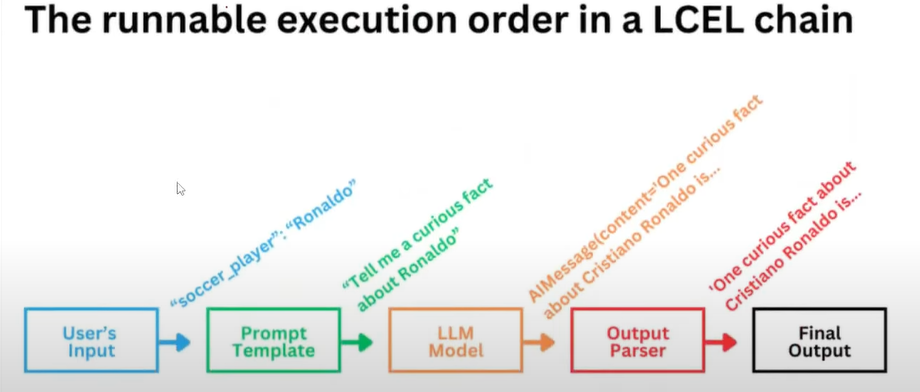

In [35]:
prompt = ChatPromptTemplate.from_template("tell me a curious fact about {soccer_player}")

output_parser = StrOutputParser()

chain = prompt | chatModel | output_parser

chain.invoke({"soccer_player": "Ronaldo"})

"Here's a curious fact about Cristiano Ronaldo: \n\nCristiano Ronaldo has a secret message tattooed on his body. He has a tattoo of the word 'SI' (which is Portuguese for 'yes') on his right ankle, which is a reminder of the struggles he faced in his childhood and the motivation he received from his mother to pursue his dreams."

# Runnable Execuation Alternative 1: Stream

Basic type

In [43]:
for s in chain.stream({"soccer_player": "Ronaldo"}):
    print(s, end="", flush=True)

A curious fact about Cristiano Ronaldo is that he is a licensed pilot. He obtained a private pilot's license in 2016, and has even been spotted flying his own helicopter on several occasions.

mordern type

In [47]:
import sys
import time

# suppose chain.stream() returns a generator
for chunk in chain.stream({"soccer_player": "Ronaldo"}):
    # Modern streaming output
    sys.stdout.write(chunk)
    sys.stdout.flush()
    time.sleep(0.05)  # optional: typewriter effect
print()  # newline after stream ends


One curious fact about Cristiano Ronaldo is that he holds a Guinness World Record for the 'most likes on an individual's Instagram post'. This record was broken in 2017 when a photo of Ronaldo and his newborn son, Cristiano Ronaldo Jr., was posted on his Instagram account, and it received over 11.3 million likes.


add some colours

In [48]:
for chunk in chain.stream({"soccer_player": "Ronaldo"}):
    sys.stdout.write(f"\033[92m{chunk}\033[0m")  # green text
    sys.stdout.flush()
    time.sleep(0.03)
print()


Here's a curious fact about Cristiano Ronaldo:

Cristiano Ronaldo is a Guinness World Record holder for the 'Most hat-tricks in the UEFA Champions League'. He has achieved this record with a total of 8 hat-tricks in the competition throughout his career.


## Async Streaming Example

In [53]:
import asyncio
import sys

# suppose your chain supports async streaming
async def stream_chain():
    async for chunk in chain.astream({"soccer_player": "Ronaldo"}):
        sys.stdout.write(chunk)  # print without newline
        sys.stdout.flush()
        await asyncio.sleep(0.02)  # typewriter effect
    print()  # newline after stream ends

# run the async function
await stream_chain()


Here's a curious fact about Cristiano Ronaldo:

Cristiano Ronaldo is a licensed pilot. He holds a private pilot's license, which he obtained in 2016. He has also been known to fly his own private jet, a Gulfstream G650ER, which he has customized with a bespoke interior and a unique design.


## for batches input, step by step

In [55]:
chain.batch([{"soccer_player": "Ronaldo"}, {"soccer_player": "Messi"}])

["Here's a curious fact about Cristiano Ronaldo:\n\nCristiano Ronaldo is a licensed pilot and has a private pilot's license. In 2016, he revealed that he had completed his training and obtained his pilot's license, which allows him to fly small planes.",
 "Here's a curious fact about Messi:\n\nLionel Messi was diagnosed with a growth hormone deficiency at the age of 11. His family couldn't afford the treatment, but a sports agent discovered him and helped secure a sponsorship deal with Adidas, which covered the cost of the treatment. This allowed Messi to grow taller and pursue his passion for football, ultimately becoming one of the greatest players in the world."]